In [2]:
# !pip install mp-api --upgrade
import numpy as np
from mp_api.client import MPRester
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

In [3]:
mp_key = "x6hAWrx1l7nO3pcKMHzrj9I3u9zQTpCo"
mp_id = "mp-924130"

In [4]:
mp = MPRester(mp_key)
structure = mp.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
xrd = XRDCalculator('CuKa')

pattern = xrd.get_pattern(structure)

def print_diffractogram_info(index):
    print(f"Le pic numéro {index + 1} du diffractogramme avec un rayonnement X incident Cu Kα se trouve à un angle 2θ de {pattern.x[index]}° avec une intensité relative de {pattern.intensity[index]}.")
    print(f"L'indice de Miller (h, k, l) correspondant est : {pattern.hkls[index][0]['hkl']} et a une multiplicité de : {pattern.hkls[index][0]['multiplicity']}.")
    print("\n")

# Affichage des informations pour les trois premiers pics du diffractogramme
for i in range(3):
    print_diffractogram_info(i)
    
print("Résulat intéressant, mes 3 premiers pics sont au même angle.")

Le pic numéro 1 du diffractogramme avec un rayonnement X incident Cu Kα se trouve à un angle 2θ de 26.129580050679266° avec une intensité relative de 49.992528923874254.
L'indice de Miller (h, k, l) correspondant est : (1, 1, 1) et a une multiplicité de : 2.


Le pic numéro 2 du diffractogramme avec un rayonnement X incident Cu Kα se trouve à un angle 2θ de 26.12971384106534° avec une intensité relative de 100.0.
L'indice de Miller (h, k, l) correspondant est : (1, 0, 0) et a une multiplicité de : 4.


Le pic numéro 3 du diffractogramme avec un rayonnement X incident Cu Kα se trouve à un angle 2θ de 26.12977545582439° avec une intensité relative de 50.00123556323952.
L'indice de Miller (h, k, l) correspondant est : (0, 0, 1) et a une multiplicité de : 2.




AttributeError: 'Axes' object has no attribute 'show'

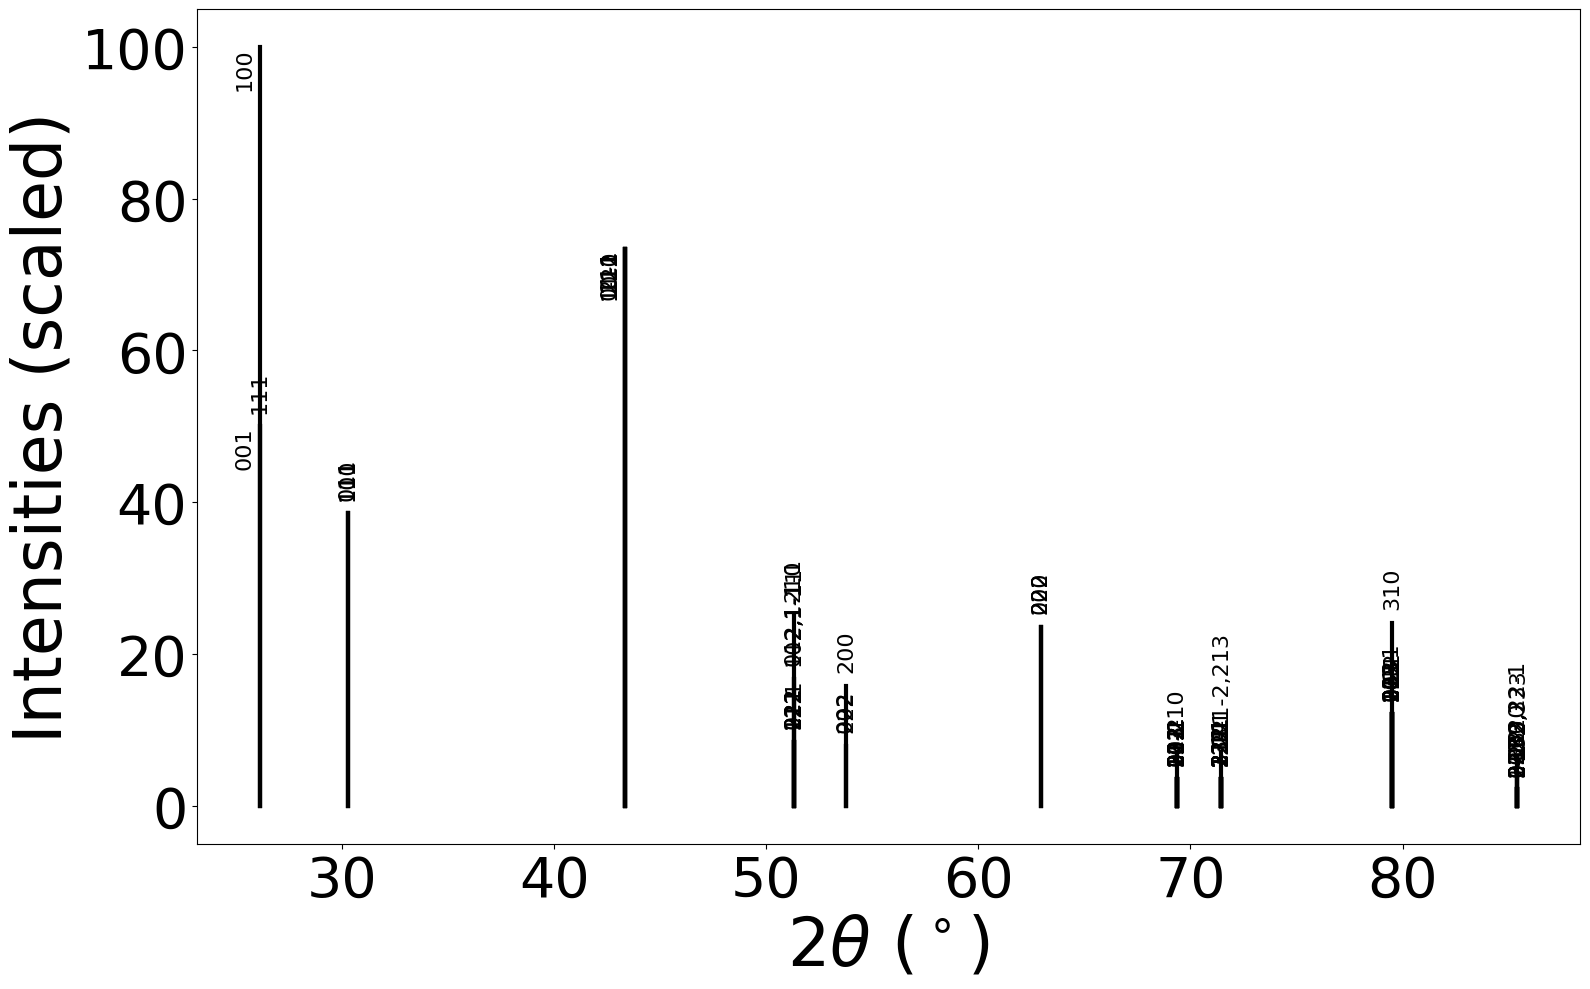

In [17]:
xrd.show_plot(structure)

In [57]:
# calculateur de pic un peu plus manuel
# print(structure)
vectors_recip = structure.lattice.reciprocal_lattice

# print(vectors_recip)
a_star = [1.737025, -0.614134, 0.000002]
b_star = [0.000005, 1.842394, -0.000007]
c_star = [-0.868520, -0.614137, 1.504307]

def d(h, k, l):  # 2 * pi / |v|
    return 2 * np.pi / np.sqrt((h * a_star[0] + k * b_star[0] + l * c_star[0])**2 + (h * a_star[1] + k * b_star[1] + l * c_star[1])**2 + (h * a_star[2] + k * b_star[2] + l * c_star[2])**2)

def two_theta(h, k, l, n, lam=1.5406):  # Loi de Bragg
    # / np.pi * 180 pour avoir des degrés
    return 2 * np.arcsin(n * lam / (2 * d(h, k, l))) / np.pi * 180

n = 1  # a priori ok pour avoir
for h in range(0, 3):
    for k in range(0, 3):
        for l in range(0, 3):
            if h == 0 and k == 0 and l == 0:
                continue
            print(f"Pour (h, k, l) = ({h}, {k}, {l}), on a que l'angle 2theta est égal à {two_theta(h, k, l, n)}")
            
print("On observe 4 pics (les premiers) qui sont tous à 26.108°. Ils correspondent aux indices de Miller : (0, 0, 1), (0, 1, 0), (1, 0, 0) et (1, 1, 1). Etrangement, le pic selon (0, 1, 0) n'est pas retranscrit par la fonction get_pattern()")
            

Pour (h, k, l) = (0, 0, 1), on a que l'angle 2theta est égal à 26.108388378872064
Pour (h, k, l) = (0, 0, 2), on a que l'angle 2theta est égal à 53.7114132107037
Pour (h, k, l) = (0, 1, 0), on a que l'angle 2theta est égal à 26.108329108937465
Pour (h, k, l) = (0, 1, 1), on a que l'angle 2theta est égal à 30.23668554120698
Pour (h, k, l) = (0, 1, 2), on a que l'angle 2theta est égal à 51.25408990836345
Pour (h, k, l) = (0, 2, 0), on a que l'angle 2theta est égal à 53.711283774190576
Pour (h, k, l) = (0, 2, 1), on a que l'angle 2theta est égal à 51.25398958021755
Pour (h, k, l) = (0, 2, 2), on a que l'angle 2theta est égal à 62.882924094455326
Pour (h, k, l) = (1, 0, 0), on a que l'angle 2theta est égal à 26.10833211967435
Pour (h, k, l) = (1, 0, 1), on a que l'angle 2theta est égal à 30.23683636664574
Pour (h, k, l) = (1, 0, 2), on a que l'angle 2theta est égal à 51.25428297526978
Pour (h, k, l) = (1, 1, 0), on a que l'angle 2theta est égal à 30.236835328889946
Pour (h, k, l) = (1, 1, 